In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [3]:
df1 = pd.read_csv("boligprisindeks.csv", sep=';')

In [4]:
df1

,Kvartal,Hele_landet,Trondheim
0,2005K1,53.4,53.8
1,2005K2,54.9,54.3
2,2005K3,55.4,55.0
3,2005K4,55.4,55.0
4,2006K1,58.9,59.0
...,...,...,...
71,2022K4,137.4,131.1
72,2023K1,140.0,135.5
73,2023K2,145.5,138.5
74,2023K3,141.3,135.4


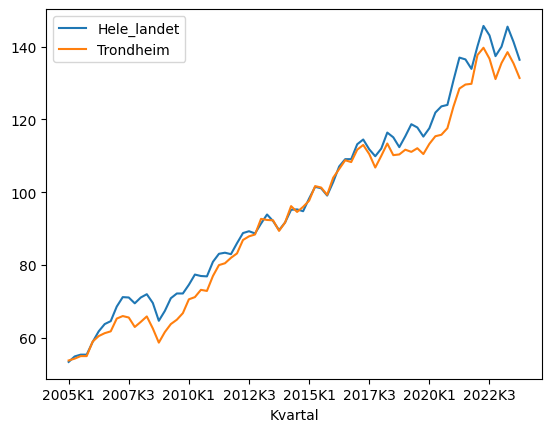

In [5]:
ax = df1.plot(x='Kvartal', y=['Hele_landet', 'Trondheim'], kind='line')


In [66]:
#Loading in the dataset into a DataFrame
df2=pd.read_csv('TrondheimHousingDataCleaned.csv')
#Renmaing the columns so that they have no spaces in them
new_column_names = { 'Matrikkel / Org-Anr': 'Matrikkel_Org_Anr', 'Housing type': 'Housing_type', 'Primary room':'Primary_room'
                    , 'Usable area': 'Usable_area', 'Gross area':'Gross_area','Year of construction':'Year_of_construction'
                    , 'Plot size':'Plot_size', 'Last sold': 'Last_sold', 'Joint debt at last sale': 'Joint_debt_at_last_sale'
                    , 'Total price at last sale': 'Total_price_at_last_sale','Number of rooms':'Number_of_rooms', 
                    'Number of bedrooms':'Number_of_bedrooms', 'Registered date':'Registered_date','Turnover rate':'Turnover_rate',
                       'Postal code':'Postal_code', 'Area name':'Area_name','Broker encoded':'Broker_encoded',
                         'Housing type encoded':'Housing_type_encoded'}
df2 = df2.rename(columns=new_column_names)
df2

,Matrikkel_Org_Anr,Address,Housing_type,Primary_room,Usable_area,Gross_area,Year_of_construction,Floor,Plot_size,Last_sold,...,Turnover_rate,Broker,Postal_code,Area_name,Broker_encoded,Housing_type_encoded,Balcony_Yes,Parking_Yes,Lat,Lon
0,5001-20/88/0/0,"Skogvegen 32, 7058 CHARLOTTENLUND",Selveier enebolig,441,517,567,2007,0,970.8,2021-02-28,...,6,Eiendomsmegler 1,7058,CHARLOTTENLUND,3,4,0,0,63.4239,10.4927
1,5001-404/418/0/69,"Tellefsens gate 8, 7030 TRONDHEIM",Selveierleilighet,135,144,0,2019,5,3673.0,2021-03-01,...,32,Eiendomsmegler 1,7030,TRONDHEIM,3,7,1,0,63.4206,10.3973
2,5001-76/267/0/15,"Siriusvegen 10 A, 7037 TRONDHEIM",Selveierleilighet,74,74,81,1995,3,9300.8,2021-03-01,...,6,Eiendomsmegler 1,7037,TRONDHEIM,3,7,1,0,63.3941,10.4113
3,5001-52/224/0/128,"Heggdalsringen 65, 7049 TRONDHEIM",Selveierleilighet,69,73,0,2019,5,4572.6,2021-03-01,...,0,Other,7049,TRONDHEIM,8,7,0,0,63.4044,10.4535
4,5001-410/683/0/34,"Dyre Halses gate 11, 7042 TRONDHEIM",Selveierleilighet,55,55,60,2004,7,1043.2,2021-03-01,...,4,DNB Eiendom,7042,TRONDHEIM,1,7,1,0,63.4364,10.4134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20583,948656132/1052,"Stallmestervegen 4 B, 7046 TRONDHEIM",Borettslagsleilighet,60,60,66,1973,2,27938.2,2024-02-28,...,13,DNB Eiendom,7046,TRONDHEIM,1,3,0,0,63.4247,10.4474
20584,950373520/388,"Othilienborgvegen 51 C, 7033 TRONDHEIM",Borettslagsleilighet,72,81,0,1967,2,996.4,2024-02-28,...,8,Eiendomsmegler 1,7033,TRONDHEIM,3,3,0,0,63.4022,10.4305
20585,5001-316/723/0/9,"Industriveien 1 K, 7072 HEIMDAL",Selveierleilighet,47,52,0,2020,2,2017.8,2024-02-28,...,12,Eiendomsmegler 1,7072,HEIMDAL,3,7,1,0,63.3517,10.3650
20586,5001-49/277/0/29,"Stokkbekken 134, 7048 TRONDHEIM",Selveierleilighet,71,87,96,2014,2,5289.2,2024-02-28,...,11,Heimdal Eiendomsmegling,7048,TRONDHEIM,4,7,1,0,63.4122,10.4696


In [67]:
#Checking the columns
columns_list = df2.columns.tolist()
print(columns_list)

['Matrikkel_Org_Anr', 'Address', 'Housing_type', 'Primary_room', 'Usable_area', 'Gross_area', 'Year_of_construction', 'Floor', 'Plot_size', 'Last_sold', 'Price', 'Joint_debt_at_last_sale', 'Total_price_at_last_sale', 'Number_of_rooms', 'Number_of_bedrooms', 'Registered_date', 'Turnover_rate', 'Broker', 'Postal_code', 'Area_name', 'Broker_encoded', 'Housing_type_encoded', 'Balcony_Yes', 'Parking_Yes', 'Lat', 'Lon']


In [68]:
#Looking at the value types
print(df2.dtypes)

Matrikkel_Org_Anr            object
Address                      object
Housing_type                 object
Primary_room                  int64
Usable_area                   int64
Gross_area                    int64
Year_of_construction          int64
Floor                         int64
Plot_size                   float64
Last_sold                    object
Price                         int64
Joint_debt_at_last_sale     float64
Total_price_at_last_sale    float64
Number_of_rooms               int64
Number_of_bedrooms            int64
Registered_date              object
Turnover_rate                 int64
Broker                       object
Postal_code                   int64
Area_name                    object
Broker_encoded                int64
Housing_type_encoded          int64
Balcony_Yes                   int64
Parking_Yes                   int64
Lat                         float64
Lon                         float64
dtype: object


In [8]:
#mod1 = smf.ols('Total_price_at_last_sale~Matrikkel_Org_Anr +Address + Housing_type + Primary_room + Usable_area + Gross_area+ Year_of_construction + Floor + Plot_size + Last_sold + Price + Joint_debt_at_last_sale + Number_of_rooms + Number_of_bedrooms + Registered_date + Turnover_rate + Broker + Postal_code + Area_name + Broker_encoded + Housing_type_encoded + Balcony_Yes + Parking_Yes + Lat + Lon', data = df2).fit()
#mod1.summary()

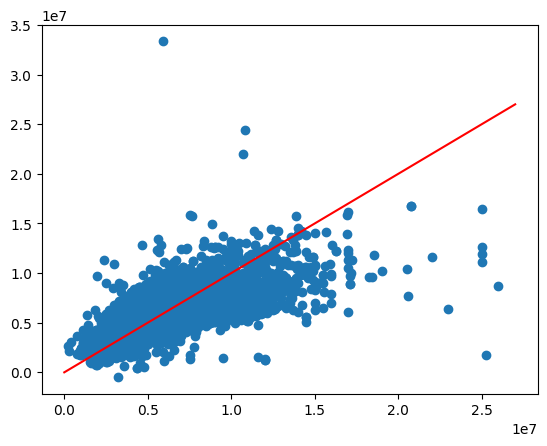

In [69]:
#Splitting the DataFrame into predictor variables and dependent variable and dropping variables that can't be used for linear regression
X=df2.drop(columns= ['Price','Total_price_at_last_sale','Matrikkel_Org_Anr','Address','Housing_type','Last_sold','Registered_date','Broker','Area_name'])
y=df2['Total_price_at_last_sale']

#Creating a linear regession model, fitting it on the dataset and using it to predict values
model=LinearRegression().fit(X,y)
y_pred=model.predict(X)

#Plotting the regression line on the predicted and actual values
fig, ax=plt.subplots()
line=np.linspace(0,27000000,2)
plt.plot(line,line,color='red')
plt.scatter(y,y_pred)
plt.show()

In [70]:
#Adding a constant term for intercept
X_with_intercept = sm.add_constant(X)

# Fitting the model on the data
model = sm.OLS(y, X_with_intercept)
result = model.fit()

# Printing summary to see both R-squared value and p-values to know which variables are insignificant and should be removed
print(result.summary())


                               OLS Regression Results                               
Dep. Variable:     Total_price_at_last_sale   R-squared:                       0.671
Model:                                  OLS   Adj. R-squared:                  0.671
Method:                       Least Squares   F-statistic:                     2472.
Date:                      Sat, 16 Mar 2024   Prob (F-statistic):               0.00
Time:                              13:51:11   Log-Likelihood:            -3.1724e+05
No. Observations:                     20588   AIC:                         6.345e+05
Df Residuals:                         20570   BIC:                         6.346e+05
Df Model:                                17                                         
Covariance Type:                  nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

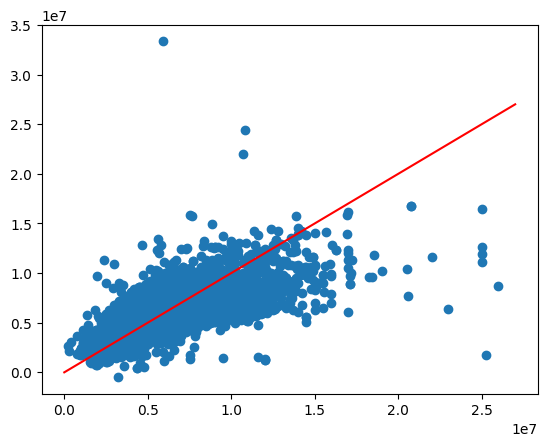

In [71]:
#Doing the same thing again while dropping the most insignificant variable: Turnover_rate
X2=df2.drop(columns= ['Price','Total_price_at_last_sale','Matrikkel_Org_Anr','Address','Housing_type','Last_sold','Registered_date','Broker','Area_name','Turnover_rate'])
y2=df2['Total_price_at_last_sale']
model2=LinearRegression().fit(X2,y2)
y_pred2=model2.predict(X2)
fig, ax=plt.subplots()
line=np.linspace(0,27000000,2)
plt.plot(line,line,color='red')
plt.scatter(y2,y_pred2)
plt.show()

In [81]:
#Doing the same as before
X_with_intercept2 = sm.add_constant(X2)

model2 = sm.OLS(y2, X_with_intercept2)
result2 = model2.fit()

print(result2.summary())

                               OLS Regression Results                               
Dep. Variable:     Total_price_at_last_sale   R-squared:                       0.671
Model:                                  OLS   Adj. R-squared:                  0.671
Method:                       Least Squares   F-statistic:                     2626.
Date:                      Sat, 16 Mar 2024   Prob (F-statistic):               0.00
Time:                              13:59:01   Log-Likelihood:            -3.1724e+05
No. Observations:                     20588   AIC:                         6.345e+05
Df Residuals:                         20571   BIC:                         6.346e+05
Df Model:                                16                                         
Covariance Type:                  nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

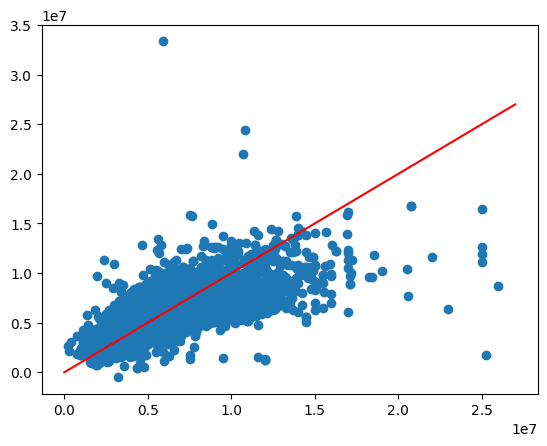

In [73]:
#Doing the same, further removal of insignificant variables
X3=df2.drop(columns= ['Price','Total_price_at_last_sale','Matrikkel_Org_Anr','Address','Housing_type','Last_sold','Registered_date','Broker','Area_name','Turnover_rate','Parking_Yes'])
y3=df2['Total_price_at_last_sale']
model3=LinearRegression().fit(X3,y3)
y_pred3=model3.predict(X3)
fig, ax=plt.subplots()
line=np.linspace(0,27000000,2)
plt.plot(line,line,color='red')
plt.scatter(y3,y_pred3)
plt.show()

In [80]:
#Further summary
X_with_intercept3 = sm.add_constant(X3)

model3 = sm.OLS(y3, X_with_intercept3)
result3 = model3.fit()

print(result3.summary())

                               OLS Regression Results                               
Dep. Variable:     Total_price_at_last_sale   R-squared:                       0.671
Model:                                  OLS   Adj. R-squared:                  0.671
Method:                       Least Squares   F-statistic:                     2801.
Date:                      Sat, 16 Mar 2024   Prob (F-statistic):               0.00
Time:                              13:58:48   Log-Likelihood:            -3.1724e+05
No. Observations:                     20588   AIC:                         6.345e+05
Df Residuals:                         20572   BIC:                         6.346e+05
Df Model:                                15                                         
Covariance Type:                  nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

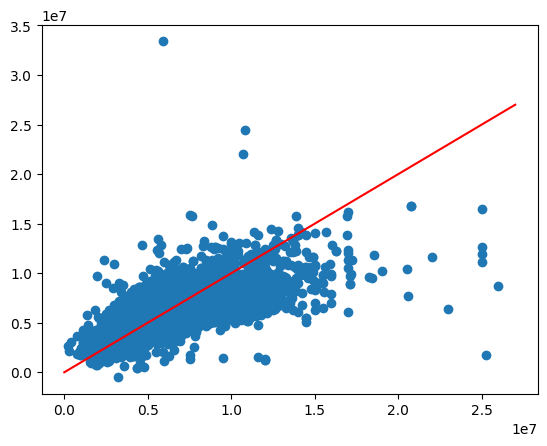

In [75]:
#Dropping the third most insignificant variable
X4=df2.drop(columns= ['Price','Total_price_at_last_sale','Matrikkel_Org_Anr','Address','Housing_type','Last_sold','Registered_date','Broker','Area_name','Turnover_rate','Parking_Yes','Balcony_Yes'])
y4=df2['Total_price_at_last_sale']
model4=LinearRegression().fit(X4,y4)
y_pred4=model4.predict(X4)
fig, ax=plt.subplots()
line=np.linspace(0,27000000,2)
plt.plot(line,line,color='red')
plt.scatter(y4,y_pred4)
plt.show()

In [79]:
#Another summary
X_with_intercept4 = sm.add_constant(X4)

model4 = sm.OLS(y4, X_with_intercept4)
result4 = model4.fit()

print(result4.summary())

                               OLS Regression Results                               
Dep. Variable:     Total_price_at_last_sale   R-squared:                       0.671
Model:                                  OLS   Adj. R-squared:                  0.671
Method:                       Least Squares   F-statistic:                     3001.
Date:                      Sat, 16 Mar 2024   Prob (F-statistic):               0.00
Time:                              13:58:28   Log-Likelihood:            -3.1724e+05
No. Observations:                     20588   AIC:                         6.345e+05
Df Residuals:                         20573   BIC:                         6.346e+05
Df Model:                                14                                         
Covariance Type:                  nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

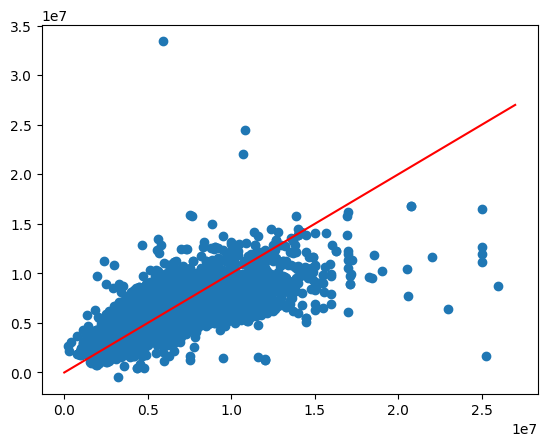

In [77]:
#Dropping the final insignificant variable
X5=df2.drop(columns= ['Price','Total_price_at_last_sale','Matrikkel_Org_Anr','Address','Housing_type','Last_sold','Registered_date','Broker','Area_name','Turnover_rate','Parking_Yes','Balcony_Yes','Lon'])
y5=df2['Total_price_at_last_sale']
model5=LinearRegression().fit(X5,y5)
y_pred5=model5.predict(X5)
fig, ax=plt.subplots()
line=np.linspace(0,27000000,2)
plt.plot(line,line,color='red')
plt.scatter(y5,y_pred5)
plt.show()

In [78]:
#Summary of the final model
X_with_intercept5 = sm.add_constant(X5)

model5 = sm.OLS(y5, X_with_intercept5)
result5 = model5.fit()

print(result5.summary())

                               OLS Regression Results                               
Dep. Variable:     Total_price_at_last_sale   R-squared:                       0.671
Model:                                  OLS   Adj. R-squared:                  0.671
Method:                       Least Squares   F-statistic:                     3232.
Date:                      Sat, 16 Mar 2024   Prob (F-statistic):               0.00
Time:                              13:56:45   Log-Likelihood:            -3.1724e+05
No. Observations:                     20588   AIC:                         6.345e+05
Df Residuals:                         20574   BIC:                         6.346e+05
Df Model:                                13                                         
Covariance Type:                  nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

The goal here was to remove the insignificant varaibles, one by one, and then reevaluating the signifance of the remaining variables. After the least significant variable is removed, the new least significant variable is removed. Then the process repeats until the last insignificant is removed, and all the remaining variables are significant.

After removing the insignificant variables, the model has not improved. The R-squared and the R-squared adjusted is still 0.671. There is a certain degree of correlation between the variables and the total price at sale. 0.671 is not terrible, but it is not really good either, so there is definetely room for improvement.
This model will serve as a bench mark for the decision tree model we will use later on. The goal is to create a more accurate model.

In [83]:
data = {'Year': [2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022,2023,2023,2023,2023,2023,2023,2023,2023,2023,2023,2023,2023,2024,2024], 'Month': [1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2]}
CPI = pd.DataFrame(data)
CPI

,Year,Month
0,2021,1
1,2021,2
2,2021,3
3,2021,4
4,2021,5
5,2021,6
6,2021,7
7,2021,8
8,2021,9
9,2021,10
